In [120]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

### Step 1: Downloading and preparing data 

In [121]:
geo0=pd.read_csv('/datasets/geo_data_0.csv')
geo0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [122]:
geo0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [123]:
geo1=pd.read_csv('/datasets/geo_data_1.csv')
geo1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [124]:
geo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [125]:
geo2=pd.read_csv('/datasets/geo_data_2.csv')
geo2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [126]:
geo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


The dataset does not contain any missing or nan values.The data types are correct.

### Step2:Training models for each region

In [129]:
def prepare(data):
    features=data.drop(['id','product'],axis=1)
    target=data['product']
    features_train,features_valid,target_train,target_valid=train_test_split(features,target,test_size=0.25,random_state=12345)
    scaler=StandardScaler()
    scaler.fit(features_train)
    features_train=scaler.transform(features_train)
    features_valid=scaler.transform(features_valid)
    model=LinearRegression()
    model.fit(features_train,target_train)
    predicted_valid=model.predict(features_valid)
    mse=mean_squared_error(target_valid,predicted_valid)
    rmse=mse**0.5
    return target_valid,predicted_valid,rmse

In [131]:
target_valid0,predicted_valid0,rmse0=prepare(geo0)
predicted_valid0=pd.Series(predicted_valid0)
target_valid0=target_valid0.reset_index()['product']
print("Rmse:",rmse0)                                            
print("Average predicted volume of reserve for region 0:",predicted_valid0.mean())              

Rmse: 37.5794217150813
Average predicted volume of reserve for region 0: 92.59256778438038


In [166]:
target_valid1,predicted_valid1,rmse1=prepare(geo1)
predicted_valid1=pd.Series(predicted_valid1)
target_valid1=target_valid1.reset_index()['product']

print("Rmse:",rmse1)                                                
print("Average predicted volume of reserve for region 1:",predicted_valid1.mean())      

Rmse: 0.8930992867756158
Average predicted volume of reserve for region 1: 68.728546895446


In [137]:
target_valid2,predicted_valid2,rmse2=prepare(geo2)
predicted_valid2=pd.Series(predicted_valid2)
target_valid2=target_valid2.reset_index()['product']

print("Rmse:",rmse2)                                                
print("Average predicted volume of reserve for region 2:",predicted_valid2.mean())      

Rmse: 40.02970873393434
Average predicted volume of reserve for region 2: 94.96504596800489


The lowest rmse is for geo_1 ,0.89. This rmse is very small compared to the rmse for other two regions which is 37.58 for region 0 and 40.03 for region 2.The average predicted volume of reserves is also the smallest for region 1 which means that region 1 contains a high proportion of small values for product.  

### Step 3: Sufficient volume of reserve, profit calculation 

In [139]:
#sufficient volume of reserve for no losses
cost=100*1000000
no_of_wells=200
revenue_per_unit=4500
volume=cost/no_of_wells/revenue_per_unit
volume

111.11111111111111

Sufficient volume of reserve for a new well for no loss is 111.

In [140]:
#geo_0 average volume of reserve
geo0['product'].mean()

92.50000000000001

In [141]:
#geo_1 average volume of reserve
geo1['product'].mean()

68.82500000000002

In [142]:
# geo_2 average volume of reserve
geo2['product'].mean()

95.00000000000004

The sufficient volume of reserves for no losses is greater than the average volume of reserves in each region.But this volume is closest to the volume of reserve in region 2.Region 1 has lowest average volume of reserve.

### Sep 4:Profit calculation 

In [148]:
def profit(target,prediction,cnt):
    
    #prediction=pd.Series(prediction)
    sorted_series=prediction.sort_values(ascending=False)
    #print(sorted_series.head())
    #target=target.reset_index()['product']
    target=target[sorted_series.index][:cnt]
    #print(len(target))
    rev=(target.sum())*revenue_per_unit
    avg=target.mean()
    return rev-cost,avg

profit0,mean0=profit(target_valid0,predicted_valid0,200)
profit1,mean1=profit(target_valid1,predicted_valid1,200)
profit2,mean2=profit(target_valid2,predicted_valid2,200)

In [149]:
print('Mean volume of reserve for top 200 predictions:')
print('region_0:',mean0)
print('region_1:',mean1)
print('region_2:',mean2)

Mean volume of reserve for top 200 predictions:
region_0: 148.00917825710948
region_1: 137.9454077409057
region_2: 141.2261107066648


In [150]:
print('Profit_0:',profit0)
print('Profit_1:',profit1)
print('Profit_2:',profit2)

Profit_0: 33208260.431398526
Profit_1: 24150866.966815114
Profit_2: 27103499.635998324


Region 0,1,2 all have more volume of reserve than the sufficient volume of reserve.Region 0 seems most profitable.

### Step 5: Average profit, 95% confidence interval and loss evaluation for each region 

In [152]:
#risk of loss
def risk(res):
    cnt=0
    for i in range(1000):
        if res[i]<0:
            cnt+=1
    loss=cnt/1000*100
    return loss


In [161]:
state=RandomState(12345)
def ci(target,predicted):
    #print(len(target))
    res=[]
    for i in range(1000):
        subsample=predicted.sample(n=500,replace=True,random_state=state)
        #target_valid0=target_valid0.reset_index()['pro']
        target_500=target[subsample.index]
        subprofit=profit(target_500,subsample,200)
        res.append(subprofit[0])

    loss=risk(res)
    res=pd.Series(res)
    avg=res.mean()
    lower=res.quantile(0.025)
    upper=res.quantile(0.975)
    return avg,lower,upper,loss

In [162]:
#for region 0
avg0,lower0,upper0,loss0=ci(target_valid0,predicted_valid0)
print("Average profit:",avg0)    
print("95% confidence interval for profit is:",lower0,",",upper0)
print("% of loss:",loss0)

Average profit: 4259385.269105923
95% confidence interval for profit is: -1020900.9483793724 , 9479763.533583675
% of loss: 6.0


In [163]:
#for region 1
avg1,lower1,upper1,loss1=ci(target_valid1,predicted_valid1)
print("Average profit:",avg1)    
print("95% confidence interval for profit is:",lower1,",",upper1)
print("% of loss:",loss1)

Average profit: 5182594.93697325
95% confidence interval for profit is: 1281232.3143308603 , 9536129.820669085
% of loss: 0.3


In [164]:
#for region 1
avg2,lower2,upper2,loss2=ci(target_valid2,predicted_valid2)
print("Average profit:",avg2)    
print("95% confidence interval for profit is:",lower2,",",upper2)
print("% of loss:",loss2)

Average profit: 4201940.053440501
95% confidence interval for profit is: -1158526.091600102 , 9896299.398445744
% of loss: 6.2


Only for region 1 the loss percentage is less than 2.5% hence it seems the most appropriate option for digging new well out of the three regions.Also it has the highest average profit. 

In [1]:
from math import log2
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7fe0bae510d0>,
 <a list of 6 Text xticklabel objects>)

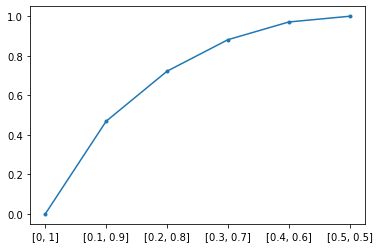

In [4]:
def entropy(events,ets=1e-15):
    return -sum([p*log2(p+ets) for p in events])

prob=[0,0.1,0.2,0.3,0.4,0.5]
dist=[[p,1-p] for p in prob]
ent=[entropy(d) for d in dist]
plt.plot(prob,ent,marker='.')
plt.xticks(prob,[str(d) for d in dist])